<a href="https://colab.research.google.com/github/Usamaahmad06/Avalanche-an-end-to-end-library-for-continual-learning/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [2]:
!pip install avalanche-lib
!pip install matplotlib-venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11

In [25]:
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from avalanche.benchmarks.classic import PermutedMNIST
from avalanche.training import Naive
import torch
from torch.optim import SGD
from torch.nn import CrossEntropyLoss
from torchvision import transforms, datasets
from avalanche.models import SimpleMLP
from avalanche.training.supervised import Naive, Replay, GDumb
from avalanche.logging import InteractiveLogger
from avalanche.training.plugins import EvaluationPlugin
from avalanche.evaluation.metrics import accuracy_metrics, loss_metrics, forgetting_metrics, timing_metrics, cpu_usage_metrics


In [3]:
import torch
import torchvision
from avalanche.benchmarks.datasets import MNIST
from avalanche.benchmarks.datasets.dataset_utils import default_dataset_location
from avalanche.benchmarks.utils import as_classification_dataset, AvalancheDataset

# Most datasets in Avalanche are automatically downloaded the first time you use them
# and stored in a default location. You can change this folder by calling
# avalanche.benchmarks.utils.set_dataset_root(new_location)
datadir = default_dataset_location('mnist')

# As we would simply do with any Pytorch dataset we can create the train and
# test sets from it. We could use any of the above imported Datasets, but let's
# just try to use the standard MNIST.
train_MNIST = MNIST(datadir, train=True, download=True)
test_MNIST = MNIST(datadir, train=False, download=True)

# transformations are managed by the AvalancheDataset
train_transforms = torchvision.transforms.ToTensor()
eval_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((32, 32))
])

# wrap datasets into Avalanche datasets
# notice that AvalancheDatasets have multiple transform groups
# `train` and `eval` are the default ones, but you can add more (e.g. replay-specific transforms)
train_MNIST = as_classification_dataset(
    train_MNIST,
    transform_groups={
        'train': train_transforms,
        'eval': eval_transforms
    }
)
test_MNIST = as_classification_dataset(
    test_MNIST,
    transform_groups={
        'train': train_transforms,
        'eval': eval_transforms
    }
)

# we can iterate the examples as we would do with any Pytorch dataset
for i, example in enumerate(train_MNIST):
    print(f"Sample {i}: {example[0].shape} - {example[1]}")
    break

# or use a Pytorch DataLoader
train_loader = torch.utils.data.DataLoader(
    train_MNIST, batch_size=32, shuffle=True
)
for i, (x, y) in enumerate(train_loader):
    print(f"Batch {i}: {x.shape} - {y.shape}")
    break

# we can also switch between train/eval transforms
train_MNIST.train()
print(train_MNIST[0][0].shape)

train_MNIST.eval()
print(train_MNIST[0][0].shape)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5432593.84it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 159063.41it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1511193.61it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4096887.91it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Sample 0: torch.Size([1, 28, 28]) - 5
Batch 0: torch.Size([32, 1, 28, 28]) - torch.Size([32])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


/usr/local/lib/python3.10/dist-packages/avalanche/training/templates/base.py:468: PositionalArgumentsDeprecatedWarning: Avalanche is transitioning to strategy constructors that accept named (keyword) arguments only. This is done to ensure that there is no confusion regarding the meaning of each argument (strategies can have many arguments). Your are passing 3 positional arguments to the Naive.__init__ method. Consider passing them as names arguments. The ability to pass positional arguments will be removed in the future.
  warnings.warn(error_str, category=PositionalArgumentsDeprecatedWarning)
/usr/local/lib/python3.10/dist-packages/avalanche/training/templates/base.py:468: PositionalArgumentsDeprecatedWarning: Avalanche is transitioning to strategy constructors that accept named (keyword) arguments only. This is done to ensure that there is no confusion regarding the meaning of each argument (strategies can have many arguments). Your are passing 3 positional arguments to the Replay.__

Running Naive strategy
-- >> Start of training phase << --
100%|██████████| 355/355 [00:09<00:00, 39.04it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9677
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 355/355 [00:05<00:00, 64.27it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9790
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
-- >> End of training phase << --
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test stream --
100%|██████████| 58/58 [00:00<00:00, 69.95it/s]
> Eval on experience 0 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000 = 0.9811
-- Starting eval on experience 1 (Task 0) from test stream --
100%|██████████| 68/68 [00:01<00:00, 60.91it/s]
> Eval on experience 1 (Task 0) from test stream ended.
	Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp001 = 0.0000
-- Starting eval on experience 2 (Task 0) from test stream --
100

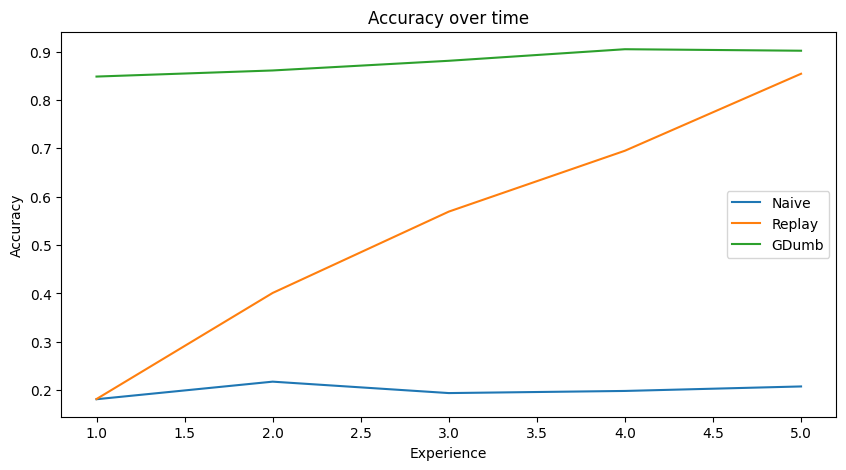

In [4]:
import torch
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torchvision import transforms
from avalanche.benchmarks.classic import SplitMNIST
from avalanche.evaluation.metrics import accuracy_metrics
from avalanche.logging import InteractiveLogger, TextLogger
from avalanche.training.plugins import EvaluationPlugin
from avalanche.training.supervised import Naive, Replay, GDumb
import matplotlib.pyplot as plt

# Load MNIST dataset with Avalanche
scenario = SplitMNIST(n_experiences=5, seed=1)

# Model definition
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(28 * 28, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 10)
)

# Loss function and optimizer
criterion = CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

# Evaluation plugin
interactive_logger = InteractiveLogger()
text_logger = TextLogger(open('log.txt', 'w'))
eval_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    loggers=[interactive_logger, text_logger]
)

# Strategies
strategies = {
    'Naive': Naive(model, optimizer, criterion, train_mb_size=32, train_epochs=2, eval_mb_size=32, evaluator=eval_plugin),
    'Replay': Replay(model, optimizer, criterion, train_mb_size=32, train_epochs=2, eval_mb_size=32, evaluator=eval_plugin, mem_size=200),
    'GDumb': GDumb(model, optimizer, criterion, train_mb_size=32, train_epochs=2, eval_mb_size=32, evaluator=eval_plugin, mem_size=200)
}

# Run strategies and collect results
results = {}
for strategy_name, strategy in strategies.items():
    print(f'Running {strategy_name} strategy')
    results[strategy_name] = []
    for experience in scenario.train_stream:
        strategy.train(experience)
        eval_results = strategy.eval(scenario.test_stream)
        acc = eval_results['Top1_Acc_Stream/eval_phase/test_stream/Task000']
        results[strategy_name].append(acc)

# Plotting results
plt.figure(figsize=(10, 5))
for strategy_name, accuracies in results.items():
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=strategy_name)
plt.xlabel('Experience')
plt.ylabel('Accuracy')
plt.title('Accuracy over time')
plt.legend()
plt.show()